In [37]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import wasserstein_distance_nd

In [8]:
num_neuron = 80
num_locs = 100

mat = np.zeros((num_neuron, num_locs))
g_func = lambda x, loc, sigma: np.exp(- (x - loc) ** 2 / sigma **2)

x_vals = np.arange(0, 100, 1)

vals = g_func(x_vals, 50, 7.5)

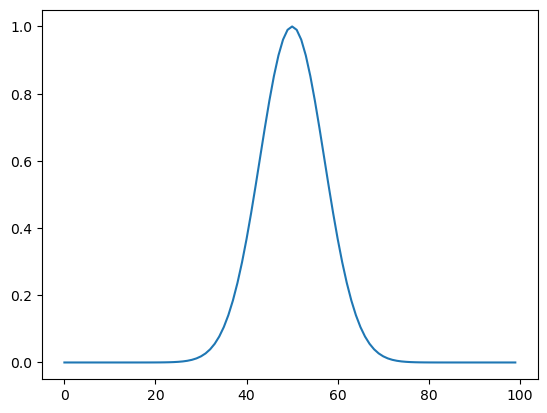

In [7]:
plt.plot(x_vals, vals)

In [13]:
for i in range(num_neuron):
    mat[i] = np.roll(vals, int(100 / 80 * i - 50))

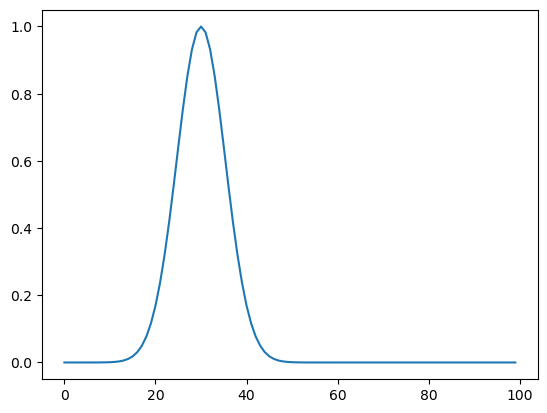

In [11]:
plt.plot(x_vals, np.roll(vals, -20))

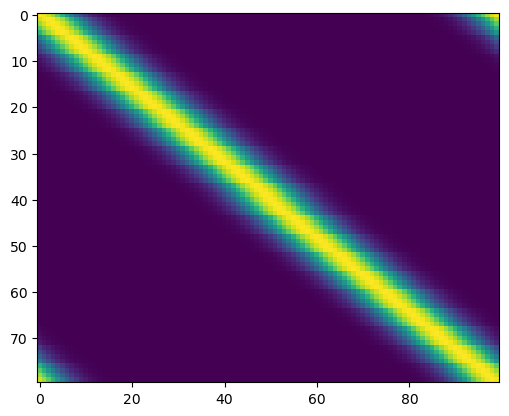

In [17]:
plt.imshow(mat)

In [75]:
results_dSpike = np.load('results_dSpike.npy')
sorting_dSpike = np.load('soting_dSpike.npy')

results_random = np.load('results_random.npy')
sorting_random = np.load('soting_random.npy')

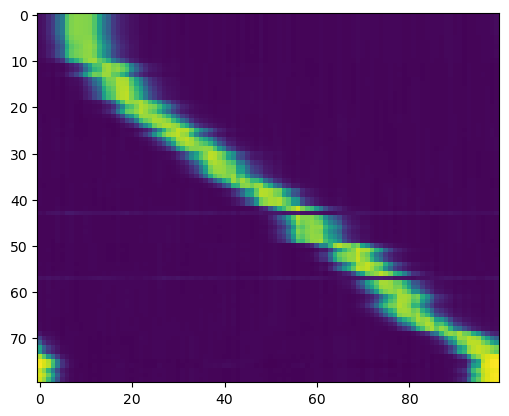

In [76]:
plt.imshow(results_dSpike[0].T[sorting_dSpike[0]])

In [77]:
wasserstein_distance_nd(mat / mat.sum(axis=1)[:, np.newaxis], results_dSpike[0].T[sorting_dSpike[0]] / results_dSpike[0].T[sorting_dSpike[0]].sum(axis=1)[:, np.newaxis])

0.09013900607391329

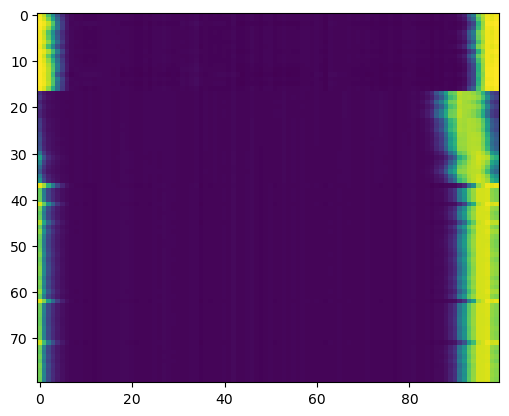

In [78]:
plt.imshow(results_random[0].T[sorting_random[0]])

In [79]:
wasserstein_distance_nd(mat / mat.sum(axis=1)[:, np.newaxis] , results_random[0].T[sorting_random[0]] / results_random[0].T[sorting_random[0]].sum(axis=1)[:, np.newaxis])

0.26328915788810264

In [80]:
dSpike = []
for i, results in enumerate(results_dSpike):
    mask = sorting_dSpike[i]

    emp_mat = results.T[mask]

    dSpike.append(wasserstein_distance_nd(mat / mat.sum(axis=1)[:, np.newaxis] , emp_mat / emp_mat.sum(axis=1)[:, np.newaxis]))

In [81]:
random = []
for i, results in enumerate(results_random):
    mask = sorting_random[i]

    emp_mat = results.T[mask]

    random.append(wasserstein_distance_nd(mat / mat.sum(axis=1)[:, np.newaxis] , emp_mat / emp_mat.sum(axis=1)[:, np.newaxis]))

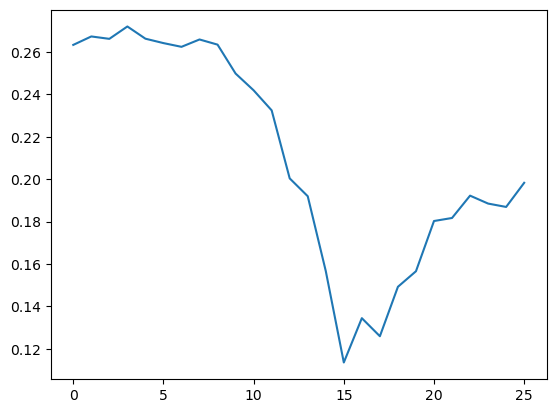

In [82]:
plt.plot(random)

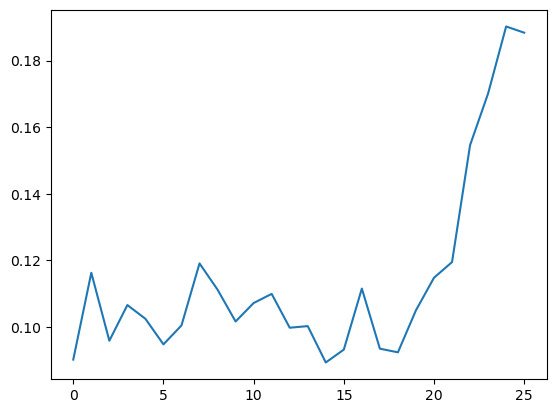

In [83]:
plt.plot(dSpike)

In [44]:
a = mat / mat.sum(axis=1)[:, np.newaxis]

In [86]:
d = 0.2
exp_random = np.arange(-6, -1 + d, d)[::-1]
exp_dSpike = np.arange(-4, 1 + d, d)[::-1]

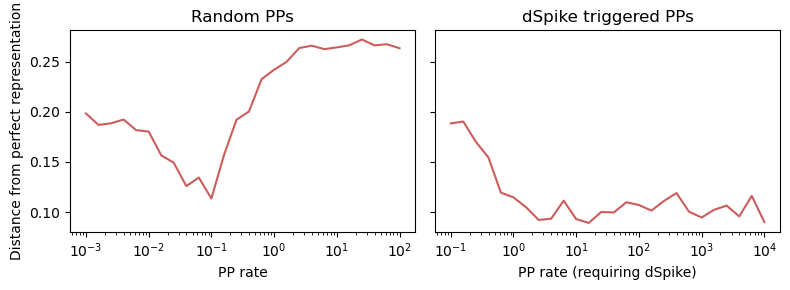

In [92]:
fig, axes = plt.subplots(ncols=2, figsize=(8,3), sharey=True)

axes[0].set_title('Random PPs')
axes[0].plot(10**exp_random * 1e3, random, color='indianred')
axes[0].set_xscale('log')
axes[0].set_xlabel('PP rate')
axes[0].set_ylabel('Distance from perfect representation')
axes[1].plot(10**exp_dSpike * 1e3, dSpike, color='indianred')
axes[1].set_xscale('log')
axes[1].set_xlabel('PP rate (requiring dSpike)')

axes[1].set_title('dSpike triggered PPs')
plt.tight_layout()
plt.savefig('dSpike_advantage.png')

In [67]:
10**exp_random

array([1.00000000e-01, 6.30957344e-02, 3.98107171e-02, 2.51188643e-02,
       1.58489319e-02, 1.00000000e-02, 6.30957344e-03, 3.98107171e-03,
       2.51188643e-03, 1.58489319e-03, 1.00000000e-03, 6.30957344e-04,
       3.98107171e-04, 2.51188643e-04, 1.58489319e-04, 1.00000000e-04,
       6.30957344e-05, 3.98107171e-05, 2.51188643e-05, 1.58489319e-05,
       1.00000000e-05, 6.30957344e-06, 3.98107171e-06, 2.51188643e-06,
       1.58489319e-06, 1.00000000e-06])

In [70]:
1 / 30

0.03333333333333333